# Predicting personal financial distress

### Import data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

credit = pd.read_csv("cleaned.csv")
credit.head(10)

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents,MissingMonthlyIncome,MissingNumberOfDependents
0,1,0.766127,45,2,0.802982,9120.000000,13,0,6,0,2.0,1,1
1,0,0.957151,40,0,0.121876,2600.000000,4,0,0,0,1.0,1,1
2,0,0.658180,38,1,0.085113,3042.000000,2,1,0,0,0.0,1,1
3,0,0.233810,30,0,0.036050,3300.000000,5,0,0,0,0.0,1,1
4,0,0.907239,49,1,0.024926,63588.000000,7,0,1,0,0.0,1,1
5,0,0.213179,74,0,0.375607,3500.000000,3,0,1,0,1.0,1,1
6,0,0.305682,57,0,5710.000000,6670.221237,8,0,3,0,0.0,0,1
7,0,0.754464,39,0,0.209940,3500.000000,8,0,0,0,0.0,1,1
8,0,0.116951,27,0,46.000000,6670.221237,2,0,0,0,0.0,0,0
9,0,0.189169,57,0,0.606291,23684.000000,9,0,4,0,2.0,1,1


In [2]:
# Perform log transformation on MonthlyIncome
credit["MonthlyIncome"] = credit["MonthlyIncome"] + 1
credit["MonthlyIncome"] = np.log(credit["MonthlyIncome"])
credit.head(10)

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents,MissingMonthlyIncome,MissingNumberOfDependents
0,1,0.766127,45,2,0.802982,9.118335,13,0,6,0,2.0,1,1
1,0,0.957151,40,0,0.121876,7.863651,4,0,0,0,1.0,1,1
2,0,0.658180,38,1,0.085113,8.020599,2,1,0,0,0.0,1,1
3,0,0.233810,30,0,0.036050,8.101981,5,0,0,0,0.0,1,1
4,0,0.907239,49,1,0.024926,11.060196,7,0,1,0,0.0,1,1
5,0,0.213179,74,0,0.375607,8.160804,3,0,1,0,1.0,1,1
6,0,0.305682,57,0,5710.000000,8.805558,8,0,3,0,0.0,0,1
7,0,0.754464,39,0,0.209940,8.160804,8,0,0,0,0.0,1,1
8,0,0.116951,27,0,46.000000,8.805558,2,0,0,0,0.0,0,0
9,0,0.189169,57,0,0.606291,10.072597,9,0,4,0,2.0,1,1


### Prepare train and test set

In [3]:
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(credit, test_size=0.2, random_state=42)

X_train = train_set.drop('SeriousDlqin2yrs', axis=1)
Y_train = train_set['SeriousDlqin2yrs']

X_test = test_set.drop('SeriousDlqin2yrs', axis=1)
Y_test = test_set['SeriousDlqin2yrs']

X = credit.drop('SeriousDlqin2yrs', axis=1)
Y = credit['SeriousDlqin2yrs']

### Stochastic Gradient Descent (SGD) Model

In [4]:
from sklearn.linear_model import SGDClassifier
sgd = SGDClassifier(max_iter=100, tol=0.001, random_state=22)

# Train the model using the train set
sgd.fit(X_train, Y_train)
sgd.intercept_, sgd.coef_

(array([40.90106683]),
 array([[ -3.60423244,  -0.14582135,   1.55422014,  -0.1295412 ,
          -2.51421846,   0.04709758,   1.87756314,   0.80156458,
          -2.93544724,   0.50811043,  -4.59291977, -12.9844405 ]]))

To evaluate our SGD classifier, we compute the accuracy score, the confusion matrix, perform a cross validation with 5 folds, plot the ROC, and compute the ROC area under the curve.

In [5]:
# Predict the train set 
Y_train_pred = sgd.predict(X_train)

# Compute accuracy score
from sklearn.metrics import accuracy_score
accuracy_score(Y_train, Y_train_pred)

0.8925991049925416

In [6]:
# Perform cross validation and compute accuracy score
from sklearn.model_selection import cross_val_score
cross_val_score(sgd, X, Y, cv=5)

array([0.90766974, 0.91206667, 0.92796667, 0.92503083, 0.92476416])

In [7]:
# Confusion matrix with cross valiation
from sklearn.model_selection import cross_val_predict

Y_train_cv_pred = cross_val_predict(sgd, X_train, Y_train, cv=5)
pd.crosstab(Y_train, Y_train_cv_pred, rownames=['True'], colnames=['Predicted'], margins=True)

Predicted,0,1,All
True,,,
0,100193,11739,111932
1,6511,1556,8067
All,106704,13295,119999


In [9]:
from sklearn.metrics import classification_report
print(classification_report(Y_train,Y_train_cv_pred))

              precision    recall  f1-score   support

           0       0.94      0.90      0.92    111932
           1       0.12      0.19      0.15      8067

   micro avg       0.85      0.85      0.85    119999
   macro avg       0.53      0.54      0.53    119999
weighted avg       0.88      0.85      0.86    119999



In [10]:
# Compute false positive rate, true positive rate, and thresholds
from sklearn.metrics import roc_curve

Y_pred_proba = cross_val_predict(sgd, X_train, Y_train, cv=5, method="decision_function")
fpr_sgd, tpr_sgd, thresholds_sgd = roc_curve(Y_train, Y_pred_proba)

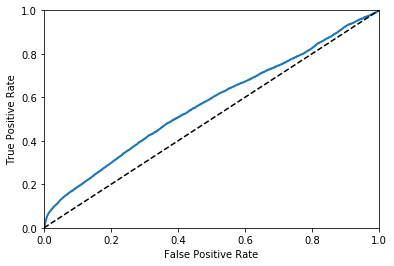

In [11]:
def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.axis([0, 1, 0, 1])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
plot_roc_curve(fpr_sgd, tpr_sgd)
plt.show()

In [12]:
# Compute area under ROC curve
from sklearn.metrics import roc_auc_score
roc_auc_score(Y_train, Y_pred_proba)

0.5700837609657294

Notice that even though the accuracy score is high (~90%), the area under the ROC curve is only about 57%. Since our dataset only has about 10% instances of response 1 (people will face financial distress in the next two years), ROC is a more reliable evaluation. In this case, it tells us that our model does not work well in seperating the two classes, and the 90% accuracy is likely coming from the skewed data and our model's tendency to classify people into class 1. Thus, we will only use ROC curve and the area under the curve as model evaluation for this dataset.

We plot ROC curve with 5 folds cross validation and compute the area under the curve to see how well the model generalizes to unseen data.

In [31]:
import matplotlib.pylab as plb
import matplotlib.patches as patches
from scipy import interp
from sklearn.metrics import roc_curve, auc

def plot_roc_cv(tprs, aucs, mean_fpr):
    plb.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r',
         label='Chance', alpha=.8)

    mean_tpr = np.mean(tprs, axis=0)
    mean_tpr[-1] = 1.0
    mean_auc = auc(mean_fpr, mean_tpr)
    std_auc = np.std(aucs)
    plb.plot(mean_fpr, mean_tpr, color='b',
             label=r'Mean ROC (AUC = %0.2f $\pm$ %0.2f)' % (mean_auc, std_auc),
             lw=2, alpha=.8)

    std_tpr = np.std(tprs, axis=0)
    tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
    tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
    plb.fill_between(mean_fpr, tprs_lower, tprs_upper, color='grey', alpha=.2,
                     label=r'$\pm$ 1 std. dev.')

    plb.xlim([-0.05, 1.05])
    plb.ylim([-0.05, 1.05])
    plb.xlabel('False Positive Rate')
    plb.ylabel('True Positive Rate')
    plb.title('Receiver operating characteristic with 5 folds')
    plb.legend(loc="lower right")

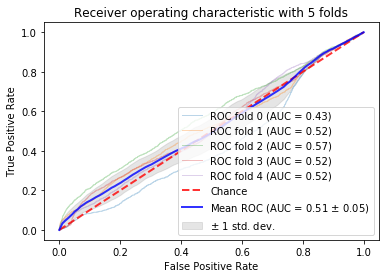

In [53]:
from sklearn.model_selection import StratifiedKFold

skf = StratifiedKFold(n_splits=5, random_state=None, shuffle=False)
skf.get_n_splits(X_train)

tprs = []
aucs = []

mean_fpr_sgd = np.linspace(0, 1, 100)
mean_tpr_sgd = np.linspace(0, 1, 100)

i = 0

for train_index, test_index in skf.split(X_train, Y_train):
    x_train, x_test = X_train.iloc[train_index], X_train.iloc[test_index]
    y_train, y_test = Y_train.iloc[train_index], Y_train.iloc[test_index]
    
    sgd.fit(x_train, y_train)
    
    # Compute ROC curve and area the curve
    Y_pred_proba = cross_val_predict(sgd, x_test, y_test, cv=5, method="decision_function")
    fpr, tpr, thresholds = roc_curve(y_test, Y_pred_proba)
    
    tprs.append(interp(mean_fpr_sgd, fpr, tpr))
    tprs[-1][0] = 0.0
    roc_auc = auc(fpr, tpr)
    aucs.append(roc_auc)
    plb.plot(fpr, tpr, lw=1, alpha=0.3,
             label='ROC fold %d (AUC = %0.2f)' % (i, roc_auc))
    mean_tpr_sgd = np.mean(tprs, axis=0)
    i += 1

plot_roc_cv(tprs, aucs, mean_fpr_sgd)
plb.show()

### K-Nearest Neighbors (KNN) Model 

In [19]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5)

# Train the model using the train set
knn.fit(X_train, Y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform')

To evaluate our KNN classifier, we plot the ROC curve and compute the area under the curve.

In [24]:
# Compute false positive rate, true positive rate, and thresholds
Y_pred_proba = knn.predict_proba(X_train)[:,1]
fpr_knn, tpr_knn, thresholds_knn = roc_curve(Y_train, Y_pred_proba)

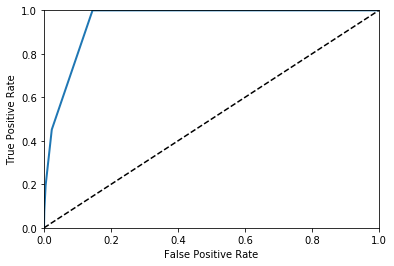

In [25]:
plot_roc_curve(fpr_knn, tpr_knn)
plt.show()

In [26]:
# Compute area under ROC curve
roc_auc_score(Y_train, Y_pred_proba)

0.9500715679831485

Even though the ROC curve looks good in this case, we want to plot ROC curve with 5 folds cross validation and compute the area under the curve to see how well the model generalizes to unseen data.

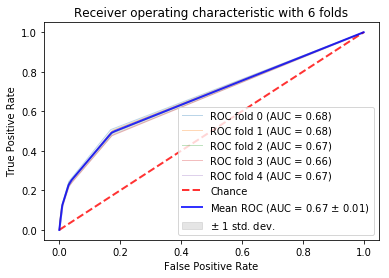

In [30]:
tprs = []
aucs = []

mean_fpr_knn = np.linspace(0, 1, 100)

i = 0

for train_index, test_index in skf.split(X_train, Y_train):
    x_train, x_test = X_train.iloc[train_index], X_train.iloc[test_index]
    y_train, y_test = Y_train.iloc[train_index], Y_train.iloc[test_index]
    
    knn.fit(x_train, y_train)
    
    # Compute ROC curve and area the curve
    Y_pred_proba = knn.predict_proba(x_test)[:,1]
    fpr, tpr, thresholds = roc_curve(y_test, Y_pred_proba)
    
    tprs.append(interp(mean_fpr_knn, fpr, tpr))
    tprs[-1][0] = 0.0
    roc_auc = auc(fpr, tpr)
    aucs.append(roc_auc)
    plb.plot(fpr, tpr, lw=1, alpha=0.3,
             label='ROC fold %d (AUC = %0.2f)' % (i, roc_auc))
    i += 1

plot_roc_cv(tprs, aucs, mean_fpr_knn)
plb.show()

The area under the curve only 67% and we can improve this with hyperparameter tuning.

Hyperparameter tuning with Grid Search:

1) Trying a bunch of different hyperparameter values

2) Fitting all of them separately

3) Checking how well each performs

4) Choosing the best performing one

5) Using cross-validation every time

Note that since the tuning process is computationally expansive so we want to run it once and save the best hyperparameters.

In [69]:
from sklearn.model_selection import GridSearchCV

# The parameter to be tuned in KNN Classifier is n_neighbors
param_grid = {'n_neighbors':np.arange(1, 50)}

In [70]:
knn = KNeighborsClassifier()
knn_gs = GridSearchCV(knn, param_grid, cv=5, n_jobs=-1, error_score='f1')
knn_gs.fit(X_train, Y_train)

GridSearchCV(cv=5, error_score='f1',
       estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform'),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [84]:
knn_gs.best_score_

0.9351744597871648

In [71]:
knn_gs.best_params_

{'n_neighbors': 19}

In [27]:
knn_tuned = KNeighborsClassifier(n_neighbors=19)

We plot ROC curve with 5 folds cross validation and compute the area under the curve to see how well the model generalizes to unseen data.

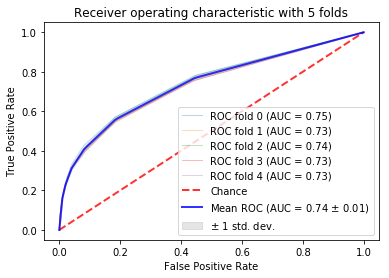

In [54]:
tprs = []
aucs = []

mean_fpr_knn = np.linspace(0, 1, 100)
mean_tpr_knn = np.linspace(0, 1, 100)

i = 0

for train_index, test_index in skf.split(X_train, Y_train):
    x_train, x_test = X_train.iloc[train_index], X_train.iloc[test_index]
    y_train, y_test = Y_train.iloc[train_index], Y_train.iloc[test_index]
    
    knn_tuned.fit(x_train, y_train)
    
    # Compute ROC curve and area the curve
    Y_pred_proba = knn_tuned.predict_proba(x_test)[:,1]
    fpr, tpr, thresholds = roc_curve(y_test, Y_pred_proba)
    
    tprs.append(interp(mean_fpr_knn, fpr, tpr))
    tprs[-1][0] = 0.0
    roc_auc = auc(fpr, tpr)
    aucs.append(roc_auc)
    plb.plot(fpr, tpr, lw=1, alpha=0.3,
             label='ROC fold %d (AUC = %0.2f)' % (i, roc_auc))
    mean_tpr_knn = np.mean(tprs, axis=0)
    i += 1

plot_roc_cv(tprs, aucs, mean_fpr_knn)
plb.show()

The mean area under the ROC curve improves from 67% to 74%. This gives us the evidence that the tuned KNN model has better performance than the untuned KNN model and the SGD model. 

### Decision Tree (DT) Model 

In [35]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(random_state=0)

# Train the model using the train set
dt.fit(X_train, Y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=0,
            splitter='best')

In [36]:
# Compute false positive rate, true positive rate, and thresholds
Y_pred_proba = dt.predict_proba(X_train)[:,1]
fpr_dt, tpr_dt, thresholds_dt = roc_curve(Y_train, Y_pred_proba)

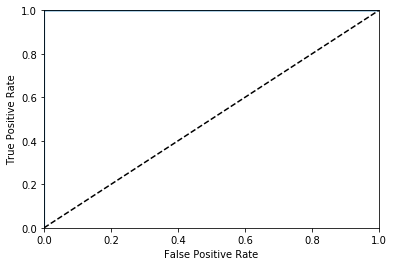

In [37]:
plot_roc_curve(fpr_dt, tpr_dt)
plt.show()

In [38]:
# Compute area under ROC curve
roc_auc_score(Y_train, Y_pred_proba)

0.9999990093641875

The nearly perfect score raises the concern of overfitting. We plot ROC curve with 5 folds cross validation and compute the area under the curve to see how well the model generalizes to unseen data.

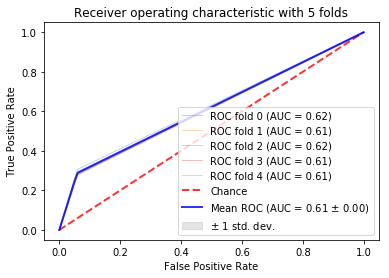

In [39]:
tprs = []
aucs = []
mean_fpr = np.linspace(0, 1, 100)

i = 0

for train_index, test_index in skf.split(X_train, Y_train):
    x_train, x_test = X_train.iloc[train_index], X_train.iloc[test_index]
    y_train, y_test = Y_train.iloc[train_index], Y_train.iloc[test_index]
    
    dt.fit(x_train, y_train)
    
    # Compute ROC curve and area the curve
    Y_pred_proba = dt.predict_proba(x_test)[:,1]
    fpr, tpr, thresholds = roc_curve(y_test, Y_pred_proba)
    
    tprs.append(interp(mean_fpr, fpr, tpr))
    tprs[-1][0] = 0.0
    roc_auc = auc(fpr, tpr)
    aucs.append(roc_auc)
    plb.plot(fpr, tpr, lw=1, alpha=0.3,
             label='ROC fold %d (AUC = %0.2f)' % (i, roc_auc))
    i += 1

plot_roc_cv(tprs, aucs, mean_fpr)
plb.show()

This provides evidence of overfitting and we need to improve our model by tuning its hyperparamter.

In [37]:
param_grid = {"max_depth": [3, 5, 10, 15, 20],
              "max_features": [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
              "min_samples_split": [2, 3, 4, 5, 6, 7, 8, 9, 10],
              "min_samples_leaf": [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
             }

In [38]:
dt = DecisionTreeClassifier()
dt_gs = GridSearchCV(dt, param_grid, cv=5, n_jobs=-1, error_score='f1')
dt_gs.fit(X_train, Y_train)

GridSearchCV(cv=5, error_score='f1',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid={'max_depth': [3, 5, 10, 15, 20], 'max_features': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10], 'min_samples_split': [2, 3, 4, 5, 6, 7, 8, 9, 10], 'min_samples_leaf': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [39]:
dt_gs.best_score_

0.9365911382594855

In [40]:
dt_gs.best_params_

{'max_depth': 5,
 'max_features': 9,
 'min_samples_leaf': 3,
 'min_samples_split': 9}

In [41]:
dt_tuned = DecisionTreeClassifier(max_depth=5, max_features=10, min_samples_leaf=4, min_samples_split=5)

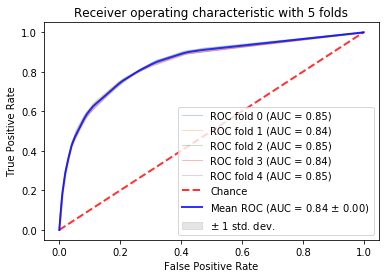

In [55]:
tprs = []
aucs = []

mean_fpr_dt = np.linspace(0, 1, 100)
mean_tpr_dt = np.linspace(0, 1, 100)

i = 0

for train_index, test_index in skf.split(X_train, Y_train):
    x_train, x_test = X_train.iloc[train_index], X_train.iloc[test_index]
    y_train, y_test = Y_train.iloc[train_index], Y_train.iloc[test_index]
    
    dt_tuned.fit(x_train, y_train)
    
    # Compute ROC curve and area the curve
    Y_pred_proba = dt_tuned.predict_proba(x_test)[:,1]
    fpr, tpr, thresholds = roc_curve(y_test, Y_pred_proba)
    
    tprs.append(interp(mean_fpr_dt, fpr, tpr))
    tprs[-1][0] = 0.0
    roc_auc = auc(fpr, tpr)
    aucs.append(roc_auc)
    plb.plot(fpr, tpr, lw=1, alpha=0.3,
             label='ROC fold %d (AUC = %0.2f)' % (i, roc_auc))
    mean_tpr_dt = np.mean(tprs, axis=0)
    i += 1

plot_roc_cv(tprs, aucs, mean_fpr_dt)
plb.show()

The mean area under the ROC curve improves to 84% and decision tree is the best model so far. 

We also want to plot the importance of each feature to better understand what matters the most in predicting whether a person will face financial distress within 2 years in our decision tree model.

In [43]:
def plot_feature_importances(model):
    plt.figure(figsize=(10,8))
    n_features = X.shape[1]
    plt.barh(range(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), X.columns)
    plt.xlabel("Feature importance")
    plt.ylabel("Feature")
    plt.ylim(-1, n_features)

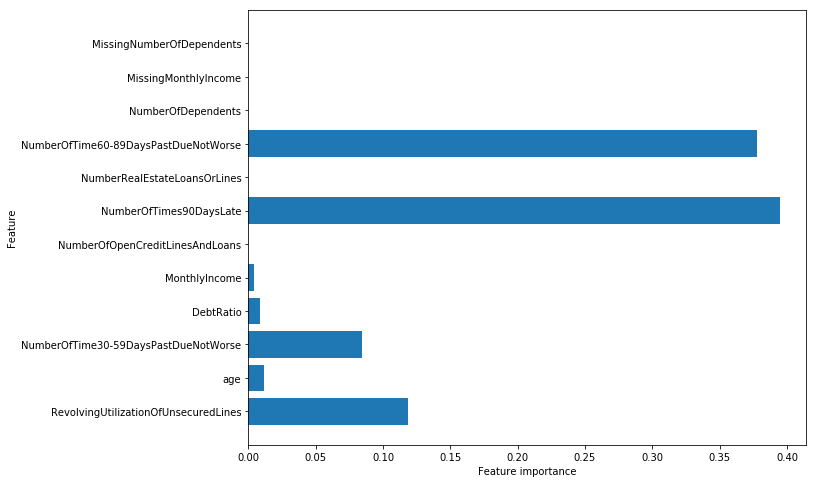

In [44]:
plot_feature_importances(dt_tuned)

### Random Forest (RF) Model

In [46]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint as sp_randint

In [44]:
param_dist = {"n_estimators": [10, 50, 100, 200, 300, 400, 500, 600, 700],
              "max_depth": [3, 5, 7, 9, 11, 13],
              "max_features": sp_randint(1, 10),
              "min_samples_split": sp_randint(2, 11),
              "min_samples_leaf": sp_randint(1, 11),
              "max_leaf_nodes": sp_randint(5, 25),
              "bootstrap": [True, False]
             }

In [52]:
rf = RandomForestClassifier()
rf_gs = RandomizedSearchCV(rf, param_distributions=param_dist, cv=5, n_jobs=-1, error_score='f1', n_iter=30)
rf_gs.fit(X_train, Y_train)

RandomizedSearchCV(cv=5, error_score='f1',
          estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
          fit_params=None, iid=True, n_iter=30, n_jobs=-1,
          param_distributions={'n_estimators': [10, 50, 100, 200, 300, 400, 500, 600, 700], 'max_depth': [3, 5, 7, 9, 11, 13], 'max_features': <scipy.stats._distn_infrastructure.rv_frozen object at 0x1a2937a908>, 'min_samples_split': <scipy.stats._distn_infrastructure.rv_frozen object at 0x1a2937aa20>, 'min_samples_leaf': <scipy.stats._distn_infrastructure.rv_frozen object at 0x1a2937aba8>, 'max_leaf_nodes': <scipy.stats._distn_infrastructure.rv_frozen

In [54]:
rf_gs.best_params_

{'bootstrap': True,
 'max_depth': 7,
 'max_features': 5,
 'max_leaf_nodes': 23,
 'min_samples_leaf': 7,
 'min_samples_split': 7,
 'n_estimators': 50}

In [47]:
rf_tuned = RandomForestClassifier(
    max_depth=7, max_features=5, 
    max_leaf_nodes=23, min_samples_leaf=7, 
    min_samples_split=7, n_estimators=50)

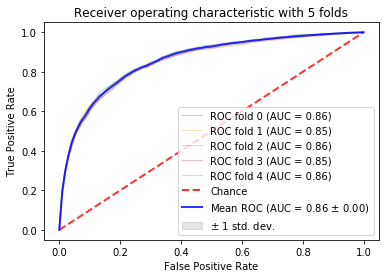

In [56]:
tprs = []
aucs = []

mean_fpr_rf = np.linspace(0, 1, 100)
mean_tpr_rf = np.linspace(0, 1, 100)

i = 0

for train_index, test_index in skf.split(X_train, Y_train):
    x_train, x_test = X_train.iloc[train_index], X_train.iloc[test_index]
    y_train, y_test = Y_train.iloc[train_index], Y_train.iloc[test_index]
    
    rf_tuned.fit(x_train, y_train)
    
    # Compute ROC curve and area the curve
    Y_pred_proba = rf_tuned.predict_proba(x_test)[:,1]
    fpr, tpr, thresholds = roc_curve(y_test, Y_pred_proba)
    
    tprs.append(interp(mean_fpr_rf, fpr, tpr))
    tprs[-1][0] = 0.0
    roc_auc = auc(fpr, tpr)
    aucs.append(roc_auc)
    plb.plot(fpr, tpr, lw=1, alpha=0.3,
             label='ROC fold %d (AUC = %0.2f)' % (i, roc_auc))
    mean_tpr_rf = np.mean(tprs, axis=0)
    i += 1

plot_roc_cv(tprs, aucs, mean_fpr_rf)
plb.show()

The mean area under the ROC curve improves to 86%, comparatively similar to the performance of decision tree.

We also want to plot the importance of each feature to better understand what matters the most in predicting whether a person will face financial distress within 2 years in our random forest model.

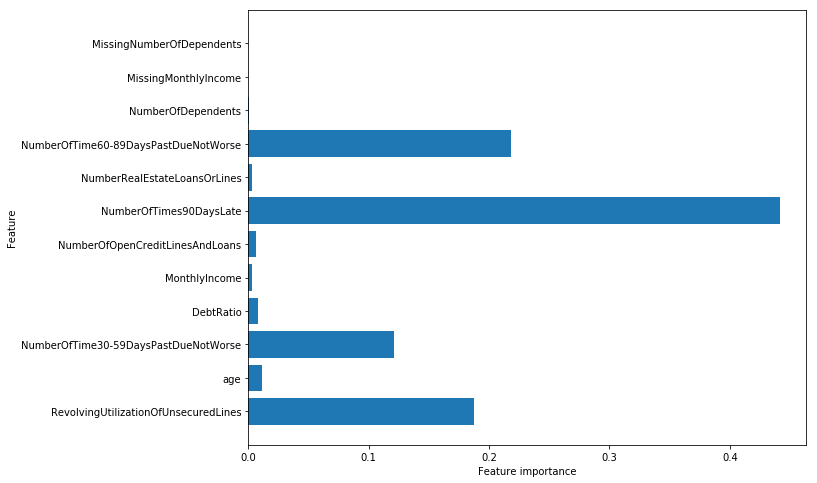

In [49]:
plot_feature_importances(rf_tuned)

### Model comparison

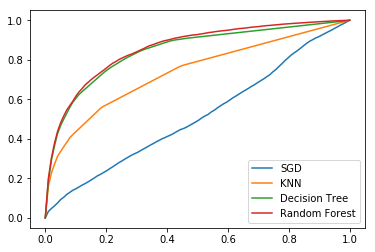

In [57]:
plt.plot(mean_fpr_sgd, mean_tpr_sgd, label="SGD")
plt.plot(mean_fpr_knn, mean_tpr_knn, label="KNN")
plt.plot(mean_fpr_dt, mean_tpr_dt, label="Decision Tree")
plt.plot(mean_fpr_rf, mean_tpr_rf, label="Random Forest")
plt.legend(loc="lower right")
plt.show()

### Performance on Test set